**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
#Import numpy, Pandas, matplotlib and seaborn modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
#Load the input csv file into a  DataFrame using read_csv() method.

weka2C_df = pd.read_csv('2Classdata.csv')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
#Check if dataframe is loaded correctly using sample() method.

weka2C_df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
#Check if dataframe is loaded correctly using sample() method.

weka2C_df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [5]:
#Random check if dataframe is loaded correctly using sample() method.

weka2C_df.sample(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
230,65.611802,23.137919,62.582179,42.473883,124.128001,-4.083298,Normal
112,42.021386,-6.554948,67.900000,48.576334,111.585782,27.338671,Abnormal
204,56.535051,14.377189,44.991547,42.157862,101.723334,25.773174,Abnormal
224,89.834676,22.639217,90.563461,67.195460,100.501192,3.040973,Normal
122,80.074914,48.069531,52.403439,32.005383,110.709912,67.727316,Abnormal
15,44.318907,12.537992,36.098763,31.780915,124.115836,5.415825,Abnormal
150,81.112605,20.690444,60.687006,60.422161,94.018783,40.510982,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
30,50.819268,15.402213,42.528939,35.417055,112.192804,10.869566,Abnormal
269,37.140150,16.481240,24.000000,20.658910,125.014361,7.366425,Normal


In [6]:
#Check the total number of records(rows) and attributes(columns) in the DataFrame using shape attribute

weka2C_df.shape

(310, 7)

In [7]:
#Check datatype information about the dataset using dtypes attribute

weka2C_df.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [8]:
#Get information on the datframe and columns-
#number of columns, length and datatypes of columns and if columns are null or not-null.

weka2C_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [9]:
#Check the presence of missing/null values using isna() function and count using sum()

weka2C_df.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [10]:
print("\nThere are no missing values in the dataset.\n")


There are no missing values in the dataset.



In [11]:
#Cheking unique values of class column using unique() method

print('\nUnique values in class column : {}\n'.format(weka2C_df['class'].unique()))


Unique values in class column : ['Abnormal' 'Normal']



In [12]:
#Use describe() function to get the 5 point summary and other statistics - count, mean and standard deviation
#transpose the results for readability.
#class column is categorical and not numeric.
#Since,mean, standard deviation and 5 point summary is not applicable, we are not including class column

weka2C_df.describe(include=[np.float]).transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [13]:
#Find the count of each class category in the dataframe using value_counts()

weka2C_df['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

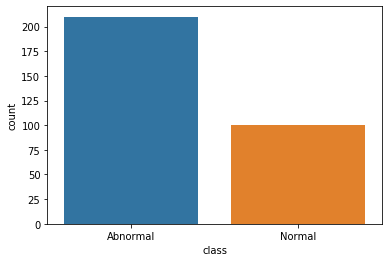

In [14]:
#Distribution of class values
#Using seaborn countplot to plot to visualize distribution of categorical column - class

sns.countplot(x='class', data=weka2C_df)
plt.show()

In [15]:
print('\nThe countplot for distribution of Categorical column - class shows-\n')
print('Count of Abnormal category are more than the count of Normal category.')


The countplot for distribution of Categorical column - class shows-

Count of Abnormal category are more than the count of Normal category.


	Distribution of categories Abnormal and Normal in class column against pelvic_incidence


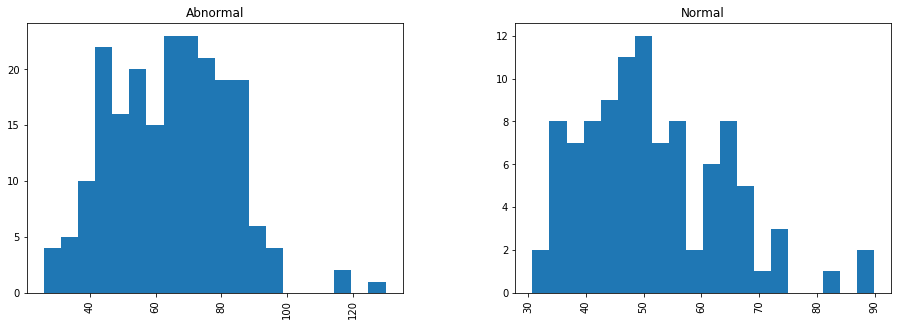

	Distribution of categories Abnormal and Normal in class column against pelvic_tilt numeric


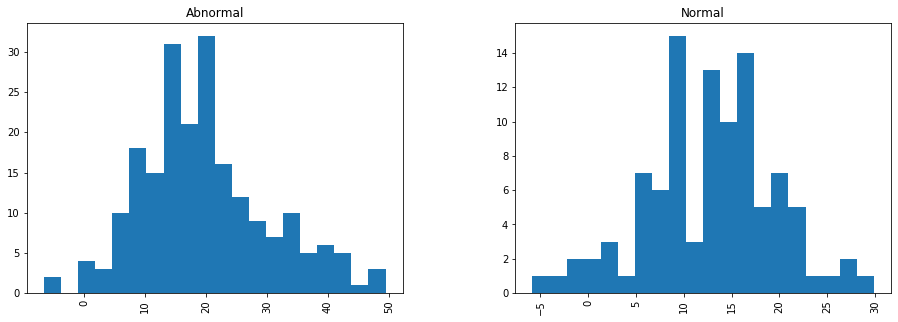

	Distribution of categories Abnormal and Normal in class column against lumbar_lordosis_angle


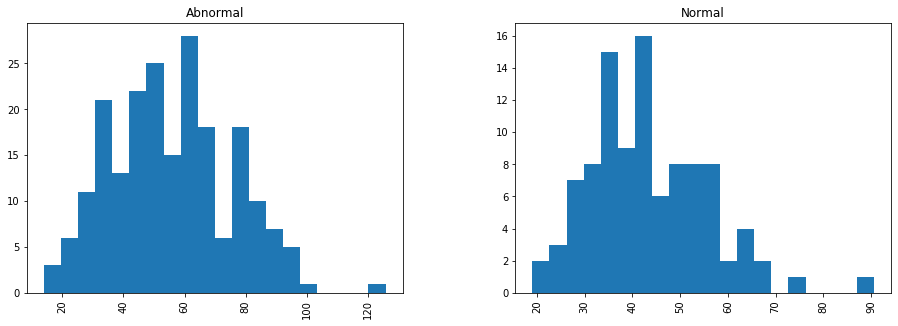

	Distribution of categories Abnormal and Normal in class column against sacral_slope


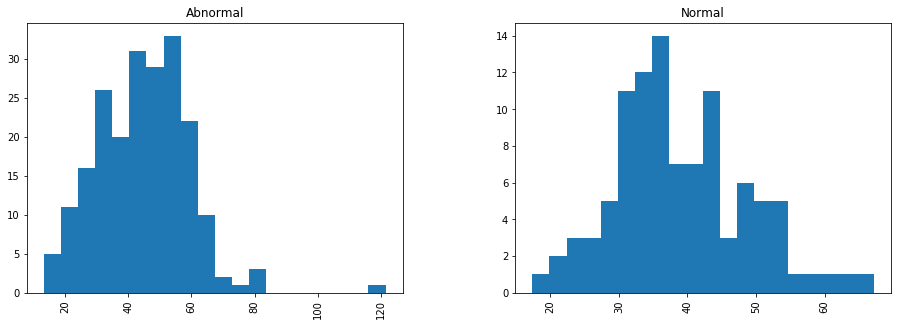

	Distribution of categories Abnormal and Normal in class column against pelvic_radius


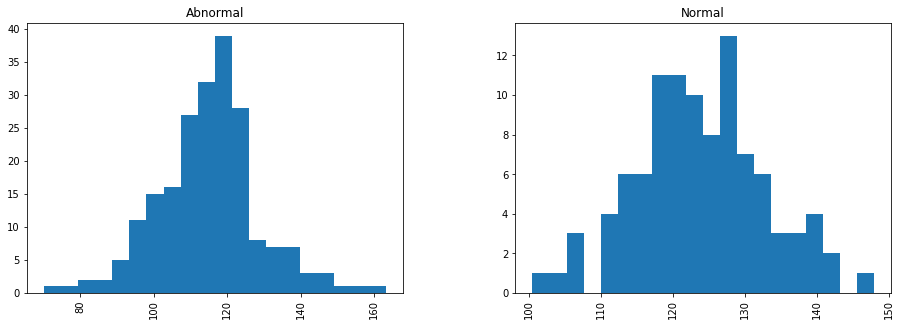

	Distribution of categories Abnormal and Normal in class column against degree_spondylolisthesis


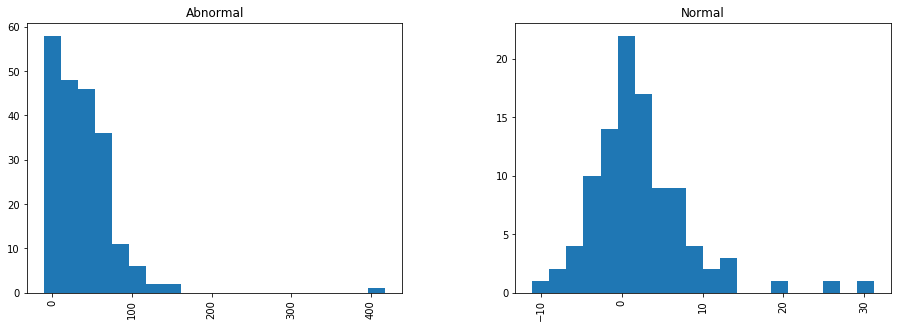

In [16]:
#Distribution of class values
#histogram plots to visualize distribution of categorical class column across the numerical columns.

for col in ['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
            'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'] :
    print('\tDistribution of categories Abnormal and Normal in class column against {}'.format(col))
    weka2C_df.hist(by='class', column=col, bins=20, figsize=(15,5))
    plt.show()

In [17]:
print("\nThe distribution of Categorical column 'class' against all other Numerical columns shows-\n")
print('None of the distributions are Normal Distributions')


The distribution of Categorical column 'class' against all other Numerical columns shows-

None of the distributions are Normal Distributions


	Distribution of Numerical column pelvic_incidence


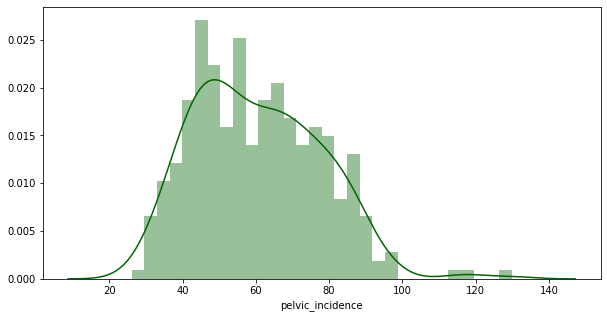

	Distribution of Numerical column pelvic_tilt numeric


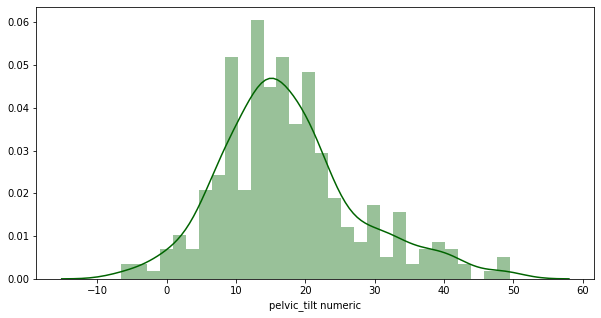

	Distribution of Numerical column lumbar_lordosis_angle


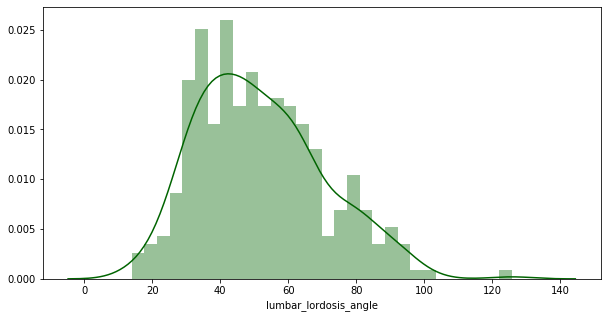

	Distribution of Numerical column sacral_slope


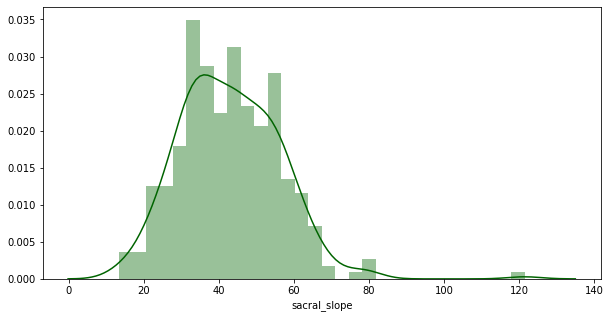

	Distribution of Numerical column pelvic_radius


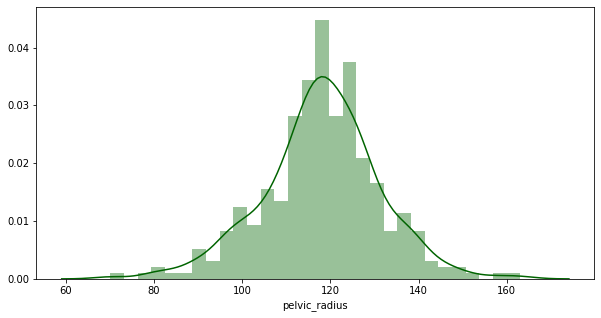

	Distribution of Numerical column degree_spondylolisthesis


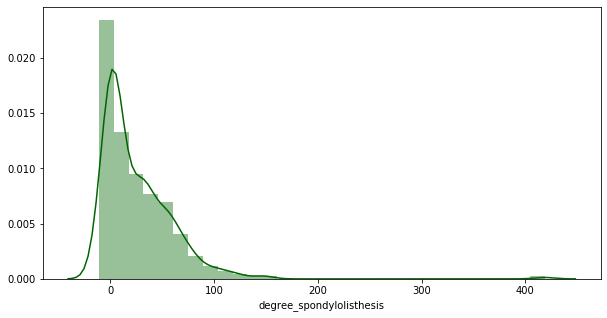

In [18]:
#Distribution of other numerical attributes
#distplots to visualize distribution of numerical columns.

for col in ['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
            'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'] :
    print('\tDistribution of Numerical column {}'.format(col))
    plt.figure(figsize=(10,5))
    sns.distplot(weka2C_df[col], bins=30, color='darkgreen')
    plt.show()

In [19]:
print("\nThe distribution of Numerical columns shows-\n")
print("Distributions for 'pelvic_tilt numeric' and 'pelvic_radius'are Slightly Normal Distributions.")
print("Distribution for 'degree_spondylolisthesis' is right skewed.")      
print("Distributions for 'pelvic_incidence','lumbar_lordosis_angle','sacral_slope'are Not Normal Distributions.")      


The distribution of Numerical columns shows-

Distributions for 'pelvic_tilt numeric' and 'pelvic_radius'are Slightly Normal Distributions.
Distribution for 'degree_spondylolisthesis' is right skewed.
Distributions for 'pelvic_incidence','lumbar_lordosis_angle','sacral_slope'are Not Normal Distributions.


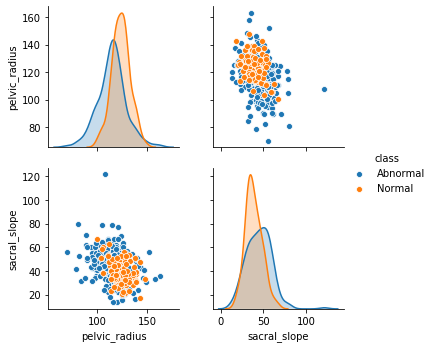

In [20]:
#Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization
#Using seaborn pairplot to plot Numerical and Categorical columns of the DataFrame - 
#Numerical columns : pelvic_radius, sacral_slope.
#Categorical columns : class.

sns.pairplot(vars=['pelvic_radius', 'sacral_slope'], hue='class', data=weka2C_df)
plt.show()

# Encode the Class variable to integer.

In [21]:
#Import LabelEncoder() class from preprocessing module of sklearn package
#Using LabelEncoder to change numerical values to categorical values
#Encode labels with value between 0 and n_classes-1 and transform non-numerical labels to numerical labels.

from sklearn.preprocessing import LabelEncoder

In [22]:
#Create an instance of LabelEncoder() class

le = LabelEncoder()

In [23]:
le

LabelEncoder()

In [24]:
#Fit label encoder and Transform labels to normalized encoding using fit_transform() method
#Change all the categories in 'class' column to numerical values 0,1 and transform them in original dataframe

weka2C_df['class'] =  le.fit_transform(weka2C_df['class'])

In [25]:
#Check the categorical values assigned to 'class' column.
#classes_ attribute holds the label for each category.It gives the array of shape

le.classes_

array(['Abnormal', 'Normal'], dtype=object)

In [26]:
#Check Datatypes.class column should be changed to integer type.

weka2C_df.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                         int32
dtype: object

In [27]:
#Check the DataFrame values using head

weka2C_df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [28]:
#Check the DataFrame values using tail

weka2C_df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,1


In [29]:
#Check the DataFrame values using sample()

weka2C_df.sample(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
261,74.976021,14.921705,53.730072,60.054317,105.645400,1.594748,1
88,56.605771,16.800200,42.000000,39.805571,127.294522,24.018575,0
262,42.517272,14.375671,25.323565,28.141601,128.905689,0.757020,1
281,64.261507,14.497866,43.902504,49.763642,115.388268,5.951454,1
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [30]:
print("Feature columns in the datset:\n{0}\n\nTarget column in the dataset:\n{1}\n"
      .format(list(weka2C_df.columns[:5]), weka2C_df.columns[-1]))

Feature columns in the datset:
['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius']

Target column in the dataset:
class



In [31]:
#Create an np array 'X' with only the feature columns for 'weka_2C' DataFrame.

X = np.array(weka2C_df.drop('class', axis=1))

In [32]:
print('Shape of Feture-set : {0}\nData type of Feature-set : {1}'.format(X.shape, X.dtype))
print('\nChecking data in Feature-set:\n{0}\n\n{1}'.format(X[:3,:], X[-3:]))

Shape of Feture-set : (310, 6)
Data type of Feature-set : float64

Checking data in Feature-set:
[[ 63.0278175   22.55258597  39.60911701  40.47523153  98.67291675
   -0.25439999]
 [ 39.05695098  10.06099147  25.01537822  28.99595951 114.4054254
    4.56425864]
 [ 68.83202098  22.21848205  50.09219357  46.61353893 105.9851355
   -3.53031731]]

[[ 61.44659663  22.6949683   46.17034732  38.75162833 125.6707246
   -2.70787952]
 [ 45.25279209   8.69315736  41.5831264   36.55963472 118.5458418
    0.21475017]
 [ 33.84164075   5.07399141  36.64123294  28.76764934 123.9452436
   -0.19924909]]


In [33]:
#Create an np array 'y' with only the target column for 'weka_2C' DataFrame.

y = np.array(weka2C_df['class'])

In [34]:
print('Shape of Target-set : {0}\nData type of Target-set : {1}'.format(y.shape, y.dtype))
print('\nChecking data in Target-set:\n{0}\n\n{1}'.format(y[:5], y[-5:]))

Shape of Target-set : (310,)
Data type of Target-set : int32

Checking data in Target-set:
[0 0 0 0 0]

[1 1 1 1 1]


# Normalize your Data (X) to get values between 0 to 1.

In [35]:
#Import zscore() function from the module scipy.stats
#zscore() used to calculate the z score of each value in the sample.

from scipy.stats import zscore

#Import MinMaxScaler() class from preprocssing module of sklearn package
#MinMaxScaler() is used for scaling features to lie between a given minimum and maximum value.
#Default feature range is between zero and one - [0,1].

from sklearn.preprocessing import MinMaxScaler

In [36]:
#Apply the zscore function from scipy.stats on feature dataset X.
#get the X_zscore dataset containing the zscores of values in all feature columns.
#This step is done to normaliize the distribution of given dataset.

X_zscore = zscore(X)

In [37]:
print('\nChecking the Z-score values in Target-set:\n{0}\n\n{1}'.format(X_zscore[:3,:], X_zscore[-3:,:]))


Checking the Z-score values in Target-set:
[[ 0.14708636  0.50136873 -0.6651769  -0.18495031 -1.4476468  -0.70805942]
 [-1.24586434 -0.74876898 -1.45300075 -1.0415207  -0.26438488 -0.57955637]
 [ 0.4843695   0.46793218 -0.09926175  0.2730833  -0.89768556 -0.79542095]]

[[ 0.05520137  0.51561812 -0.31097748 -0.31356364  0.58289256 -0.77348834]
 [-0.88582307 -0.88565951 -0.55861259 -0.47712775  0.04702109 -0.69554822]
 [-1.54892681 -1.24785954 -0.82539423 -1.05855695  0.45311695 -0.70658867]]


In [38]:
#Use MinMaxScaler class methods on feature dataset X.
#get the X_norm dataset containing values in all feature columns scaled to the [0,1] range.
#This step is done to normaliize the distribution of given dataset.

#create an instance of MinMaxScaler() class

minmax_scaler = MinMaxScaler()

In [39]:
#using fit_transform() method to fit the data points to the range[0,1] and transform them.

X_norm = minmax_scaler.fit_transform(X)

In [40]:
print('Shape of scaled Training-set : {0}\nData type of scaled Training-set : {1}'.format(X_norm.shape, X_norm.dtype))
print('\nChecking data in Training-set scaled to range [0,1]:\n{0}\n\n{1}'.format(X_norm[:3], X_norm[-3:]))

Shape of scaled Training-set : (310, 6)
Data type of scaled Training-set : float64

Checking data in Training-set scaled to range [0,1]:
[[0.35568788 0.51989984 0.22917997 0.2508573  0.30746116 0.02514839]
 [0.12450104 0.2967831  0.09857833 0.14462935 0.47664891 0.03636497]
 [0.41166648 0.51393229 0.32299466 0.30766054 0.38609692 0.0175229 ]]

[[0.34043781 0.52244298 0.28789745 0.23490726 0.59779618 0.01943732]
 [0.18425678 0.27235174 0.24684569 0.21462279 0.52117504 0.02624045]
 [0.07420202 0.20770855 0.20261992 0.14251659 0.57924032 0.02527676]]


# Split the data as train and test with a ratio of 70:30.

In [41]:
#Import test_train_split() function from the module sklearn.module_selection
#test_train_split function splits the input dataset(np array, DatFrame or lists) into random train and test subsets.

from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.30, random_state=1)

In [43]:
print("Training Set Shape:\nFeatures : {0}  Target : {1}\n".format(X_train.shape, y_train.shape))
print("Test Set Shape:\nFeatures : {0}  Target : {1}".format(X_test.shape, y_test.shape))

Training Set Shape:
Features : (217, 6)  Target : (217,)

Test Set Shape:
Features : (93, 6)  Target : (93,)


In [44]:
print("Checking data in X_train:\n{0}\n\n{1}\n".format(X_train[:3,:], X_train[-3:,:]))
print("Checking data in  X_test:\n{0}\n\n{1}\n".format(X_test[:3,:], X_test[-3:,:]))
print("Checking data in  y_train:\n{0}\n\n{1}\n".format(y_train[:5], y_train[-5:]))
print("Checking data in  y_test:\n{0}\n\n{1}\n".format(y_test[:5], y_test[-5:]))

Checking data in X_train:
[[0.47741984 0.46251512 0.44878839 0.39738992 0.27768018 0.18763791]
 [0.22035771 0.35131075 0.33893603 0.2083533  0.60561934 0.026987  ]
 [0.52009848 0.9756669  0.34367835 0.17247823 0.43690728 0.18339214]]

[[0.56734895 0.70688295 0.41935629 0.35707094 0.59767583 0.19876941]
 [0.36438386 0.47379095 0.23426249 0.28308992 0.46224404 0.        ]
 [0.0921583  0.46436296 0.05995934 0.02677405 0.72544522 0.02512723]]

Checking data in  X_test:
[[0.39797628 0.42863211 0.41295557 0.33871847 0.44136006 0.10292294]
 [0.35567325 0.60534235 0.33653315 0.20657584 0.47773703 0.04305865]
 [0.62998616 0.55482934 0.63199181 0.49594972 0.50786215 0.14823333]]

[[0.28639672 0.63233456 0.30150192 0.12612045 0.57242874 0.03228716]
 [0.13696505 0.29917218 0.21449109 0.1553508  0.62295202 0.02680877]
 [0.15309151 0.         0.48235949 0.32582403 0.4463264  0.08937788]]

Checking data in  y_train:
[0 1 0 0 0]

[0 1 0 1 0]

Checking data in  y_test:
[0 1 0 0 0]

[0 1 0 1 0]



# Build the KNN model using Train Dataset and predict the class on test dataset.

In [45]:
#Import KNeighboursClassifier() class from sklearn.neighbours module
#KNeighboursClassifier methods implement the k-nearest neighbors algorithm.

from sklearn.neighbors import KNeighborsClassifier

In [46]:
#for n_neighbour value of k=5 create an instance of KNeighboursClassifier class.
#the input params used are k=5 weights used for prediction is distance, p=2 default indicating euclidean distance.
#the algorithm used for prediction is auto (autogenearted based on datasets passsed to fit() method).

k=5
KNN = KNeighborsClassifier(n_neighbors=k, weights='distance')
KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [47]:
#fit method is used to Fit the model using X as feature-set and y as target-set

KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [48]:
#predict method is used to Predict the class labels for the provided test dataset.

yhat = KNN.predict(X_test)

In [49]:
#shape of predicted class labels

yhat.shape

(93,)

In [50]:
#checking data in predicted class labels

print(yhat[:5],'   ',yhat[-5:])

[0 0 0 0 1]     [1 1 0 0 0]


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [51]:
#score method is used to find mean accuracy on the given training data and test data.
#returns the mean accuracy on the given test data and labels.

KNN.score(X_test,y_test)

0.7526881720430108

In [52]:
print('\nThe Perorformance score or mean accuracy of KNN prediction with K value of {0} on test dataset is {1}\n'.format( k, KNN.score(X_test,y_test) ) )


The Perorformance score or mean accuracy of KNN prediction with K value of 5 on test dataset is 0.7526881720430108



# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [53]:
#Using score() method in KNeighborsClassifier class to find the best K value.
#The score() method takes the passed matrix X_test,calls predict and calls accuracy_score.
#We need not explicitly call the predict() method to predict the labels.
#Finding the mean accuracy for K values in range from 1 to 100 to find best K value.

k_range = 100
mean_test_acc = np.zeros(k_range)

for n in range(1,k_range+1) :
    KNN = KNeighborsClassifier(n_neighbors=n, weights='distance')
    KNN.fit(X_train, y_train)
    mean_test_acc[n-1] = KNN.score(X_test, y_test)  

In [54]:
#the array of mean accuracy scores using score() method for different K values in the range taken.

mean_test_acc

array([0.76344086, 0.76344086, 0.75268817, 0.76344086, 0.75268817,
       0.7311828 , 0.75268817, 0.77419355, 0.74193548, 0.78494624,
       0.77419355, 0.77419355, 0.77419355, 0.77419355, 0.75268817,
       0.76344086, 0.77419355, 0.78494624, 0.79569892, 0.80645161,
       0.80645161, 0.8172043 , 0.80645161, 0.79569892, 0.8172043 ,
       0.8172043 , 0.80645161, 0.8172043 , 0.80645161, 0.80645161,
       0.79569892, 0.79569892, 0.8172043 , 0.79569892, 0.80645161,
       0.80645161, 0.79569892, 0.78494624, 0.79569892, 0.79569892,
       0.80645161, 0.80645161, 0.80645161, 0.79569892, 0.79569892,
       0.79569892, 0.79569892, 0.80645161, 0.79569892, 0.80645161,
       0.79569892, 0.79569892, 0.78494624, 0.78494624, 0.78494624,
       0.80645161, 0.77419355, 0.77419355, 0.77419355, 0.78494624,
       0.77419355, 0.78494624, 0.77419355, 0.77419355, 0.76344086,
       0.77419355, 0.77419355, 0.77419355, 0.77419355, 0.78494624,
       0.78494624, 0.78494624, 0.77419355, 0.77419355, 0.77419

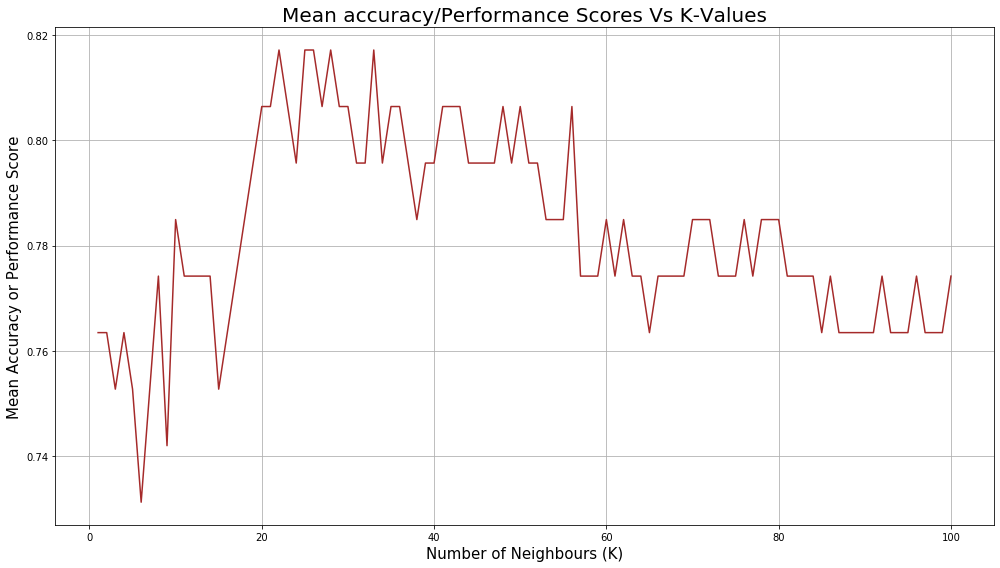

In [55]:
#Plot the Mean accuracy scores from score() method against the K values using matplotlib.pyplot.plot()

plt.figure(figsize=(14,8))
plt.plot(range(1,k_range+1), mean_test_acc, 'brown')
plt.grid()
plt.title('Mean accuracy/Performance Scores Vs K-Values', fontsize=20)
plt.xlabel('Number of Neighbours (K)', fontsize=15)
plt.ylabel('Mean Accuracy or Performance Score', fontsize=15)
plt.tight_layout()
plt.show()

In [56]:
print('\nBest accuracy is {0} for a K value of {1}'.format(mean_test_acc.max(), mean_test_acc.argmax()+1))
print('\nThe Best K-value for the classification is K = {}\n'.format(mean_test_acc.argmax()+1))


Best accuracy is 0.8172043010752689 for a K value of 22

The Best K-value for the classification is K = 22



In [57]:
#Import accuracy_score() function from sklearn.metrics module
#This metrics module includes score functions, performance metrics, pairwise metrics and distance computations.
#accuracy_score() gives Accuracy classification score.calculates accuracy of set of labels predicted for a sample.

from sklearn.metrics import accuracy_score

In [58]:
#Using accuracy_score() method from sklearn.metrics to find the best K value.
#We need to call the predict() method to predict the labels before using accuracy_score() method.
#Misclassification error (MSE) = 1 - Test accuracy score.
#Finding the accuracy score for K values in range from 1 to 100 to find best K value.

k_range = 100
acc_score = np.zeros(k_range)
misclass_err = np.zeros(k_range)

for n in range(1,k_range+1) :
    KNN = KNeighborsClassifier(n_neighbors=n, weights='distance')
    KNN.fit(X_train, y_train)
    yhat = KNN.predict(X_test)
    acc_score[n-1] = accuracy_score(y_test, yhat)
    misclass_err[n-1] = 1 - accuracy_score(y_test, yhat)

In [59]:
#the array of accuracy scores using accuracy_score() method for different K values in the range taken.

acc_score

array([0.76344086, 0.76344086, 0.75268817, 0.76344086, 0.75268817,
       0.7311828 , 0.75268817, 0.77419355, 0.74193548, 0.78494624,
       0.77419355, 0.77419355, 0.77419355, 0.77419355, 0.75268817,
       0.76344086, 0.77419355, 0.78494624, 0.79569892, 0.80645161,
       0.80645161, 0.8172043 , 0.80645161, 0.79569892, 0.8172043 ,
       0.8172043 , 0.80645161, 0.8172043 , 0.80645161, 0.80645161,
       0.79569892, 0.79569892, 0.8172043 , 0.79569892, 0.80645161,
       0.80645161, 0.79569892, 0.78494624, 0.79569892, 0.79569892,
       0.80645161, 0.80645161, 0.80645161, 0.79569892, 0.79569892,
       0.79569892, 0.79569892, 0.80645161, 0.79569892, 0.80645161,
       0.79569892, 0.79569892, 0.78494624, 0.78494624, 0.78494624,
       0.80645161, 0.77419355, 0.77419355, 0.77419355, 0.78494624,
       0.77419355, 0.78494624, 0.77419355, 0.77419355, 0.76344086,
       0.77419355, 0.77419355, 0.77419355, 0.77419355, 0.78494624,
       0.78494624, 0.78494624, 0.77419355, 0.77419355, 0.77419

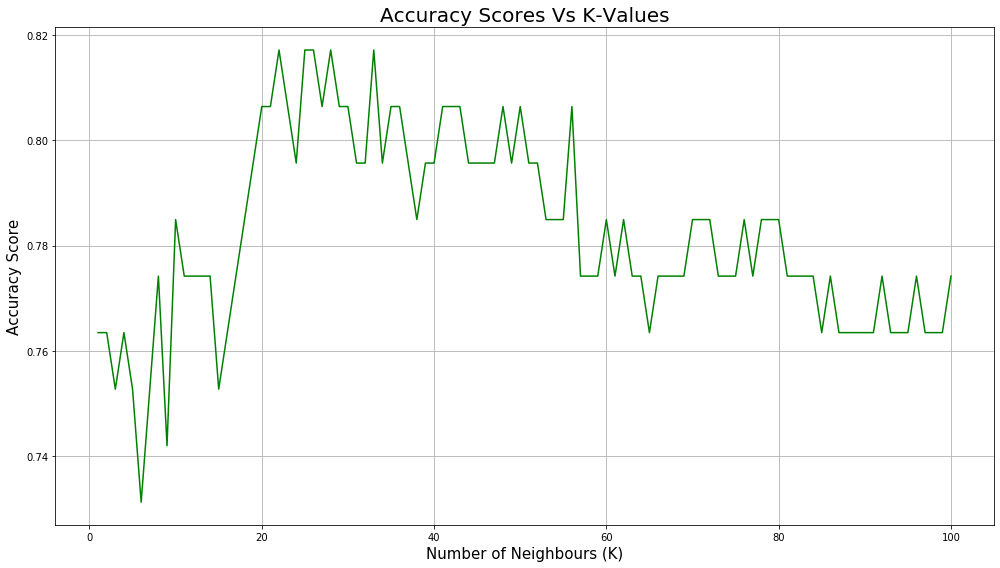

In [60]:
#Plot the accuracy scores from accuracy_score() function against the K values using matplotlib.pyplot.plot()

plt.figure(figsize=(14,8))
plt.plot(range(1,k_range+1), acc_score, 'g')
plt.grid()
plt.title('Accuracy Scores Vs K-Values', fontsize=20)
plt.xlabel('Number of Neighbours (K)', fontsize=15)
plt.ylabel('Accuracy Score', fontsize=15)
plt.tight_layout()
plt.show()

In [61]:
print('\nBest accuracy is {0} for a K value of {1}'.format(acc_score.max(), acc_score.argmax()+1))
print('\nThe Best K-value for the classification is K = {}\n'.format(acc_score.argmax()+1))


Best accuracy is 0.8172043010752689 for a K value of 22

The Best K-value for the classification is K = 22



In [62]:
#the array of Misclassification error (MSE) scores for different K values in the range taken.
#Misclassification error (MSE) is given by 1-accuracy_score()

misclass_err

array([0.23655914, 0.23655914, 0.24731183, 0.23655914, 0.24731183,
       0.2688172 , 0.24731183, 0.22580645, 0.25806452, 0.21505376,
       0.22580645, 0.22580645, 0.22580645, 0.22580645, 0.24731183,
       0.23655914, 0.22580645, 0.21505376, 0.20430108, 0.19354839,
       0.19354839, 0.1827957 , 0.19354839, 0.20430108, 0.1827957 ,
       0.1827957 , 0.19354839, 0.1827957 , 0.19354839, 0.19354839,
       0.20430108, 0.20430108, 0.1827957 , 0.20430108, 0.19354839,
       0.19354839, 0.20430108, 0.21505376, 0.20430108, 0.20430108,
       0.19354839, 0.19354839, 0.19354839, 0.20430108, 0.20430108,
       0.20430108, 0.20430108, 0.19354839, 0.20430108, 0.19354839,
       0.20430108, 0.20430108, 0.21505376, 0.21505376, 0.21505376,
       0.19354839, 0.22580645, 0.22580645, 0.22580645, 0.21505376,
       0.22580645, 0.21505376, 0.22580645, 0.22580645, 0.23655914,
       0.22580645, 0.22580645, 0.22580645, 0.22580645, 0.21505376,
       0.21505376, 0.21505376, 0.22580645, 0.22580645, 0.22580

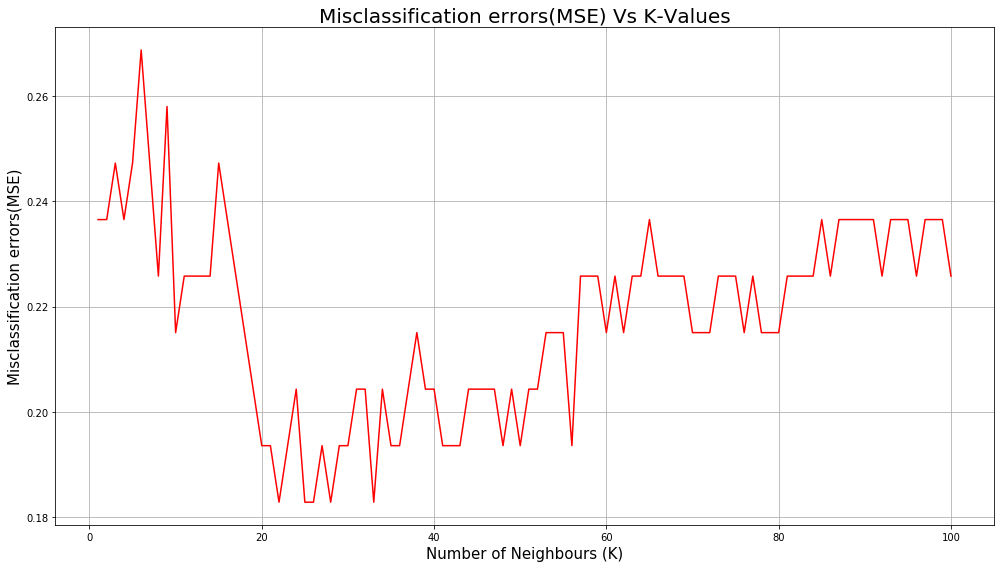

In [63]:
#Plot the Misclassification errors (MSE) against the K values using matplotlib.pyplot.plot()

plt.figure(figsize=(14,8))
plt.plot(range(1,k_range+1), misclass_err, 'r')
plt.grid()
plt.title('Misclassification errors(MSE) Vs K-Values', fontsize=20)
plt.xlabel('Number of Neighbours (K)', fontsize=15)
plt.ylabel('Misclassification errors(MSE)', fontsize=15)
plt.tight_layout()
plt.show()

In [64]:
print('\nMaximum number of Misclassification errors are seen for a score of {0} for a K value of {1}\n'.format(misclass_err.max(), misclass_err.argmax()+1))


Maximum number of Misclassification errors are seen for a score of 0.26881720430107525 for a K value of 6



# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [65]:
#Load the input csv file into a  DataFrame using read_csv() method.

weka3C_df = pd.read_csv('3Classdata.csv')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [66]:
#Check if dataframe is loaded correctly using sample() method.

weka3C_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [67]:
#Check if dataframe is loaded correctly using sample() method.

weka3C_df.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [68]:
#Random check if dataframe is loaded correctly using sample() method.

weka3C_df.sample(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
194,72.643850,18.929117,68.000000,53.714733,116.963416,25.384247,Spondylolisthesis
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
55,47.657730,13.277385,36.679985,34.380345,98.249781,6.273012,Hernia
90,81.656032,28.748869,58.232821,52.907163,114.769856,30.609148,Spondylolisthesis
64,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Spondylolisthesis
34,59.595540,31.998244,46.560252,27.597296,119.330354,1.474286,Hernia
116,70.484104,12.489488,62.417142,57.994617,114.190049,56.902448,Spondylolisthesis
149,79.249671,23.944825,40.796698,55.304846,98.622512,36.706395,Spondylolisthesis
261,74.976021,14.921705,53.730072,60.054317,105.645400,1.594748,Normal
182,75.437748,31.539454,89.600000,43.898294,106.829590,54.965789,Spondylolisthesis


In [69]:
#Check the total number of records(rows) and attributes(columns) in the DataFrame using shape attribute

weka3C_df.shape

(310, 7)

In [70]:
#Check datatype information about the dataset using dtypes attribute

weka3C_df.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [71]:
#Get information on the datframe and columns-
#number of columns, length and datatypes of columns and if columns are null or not-null.

weka3C_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [72]:
#Check the presence of missing/null values using isna() function and count using sum()

weka3C_df.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [73]:
print("\nThere are no missing values in the dataset.\n")


There are no missing values in the dataset.



In [74]:
#Cheking unique values of class column using unique() method

print('\nUnique values in class column : {}\n'.format(weka3C_df['class'].unique()))


Unique values in class column : ['Hernia' 'Spondylolisthesis' 'Normal']



In [75]:
#Use describe() function to get the 5 point summary and other statistics - count, mean and standard deviation
#transpose the results for readability.
#class column is categorical and not numeric.
#Since,mean, standard deviation and 5 point summary is not applicable, we are not including class column

weka3C_df.describe(include=[np.float]).transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [76]:
#Find the count of each class category in the dataframe using value_counts()

weka3C_df['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

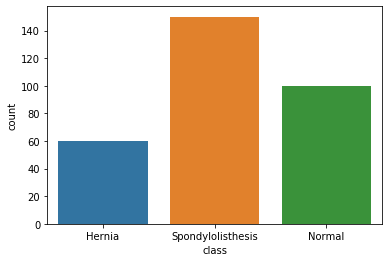

In [77]:
#Distribution of class values
#Using seaborn countplot to plot to visualize distribution of categorical column - class

sns.countplot(x='class', data=weka3C_df)
plt.show()

In [78]:
print('\nThe countplot for distribution of Categorical column - class shows-\n')
print('Count of Spondylolisthesis category are more followed by count of Normal category and then count of Hernia.')


The countplot for distribution of Categorical column - class shows-

Count of Spondylolisthesis category are more followed by count of Normal category and then count of Hernia.


	Distribution of categories Hernia, Normal and Spondylolisthesis in class column against pelvic_incidence


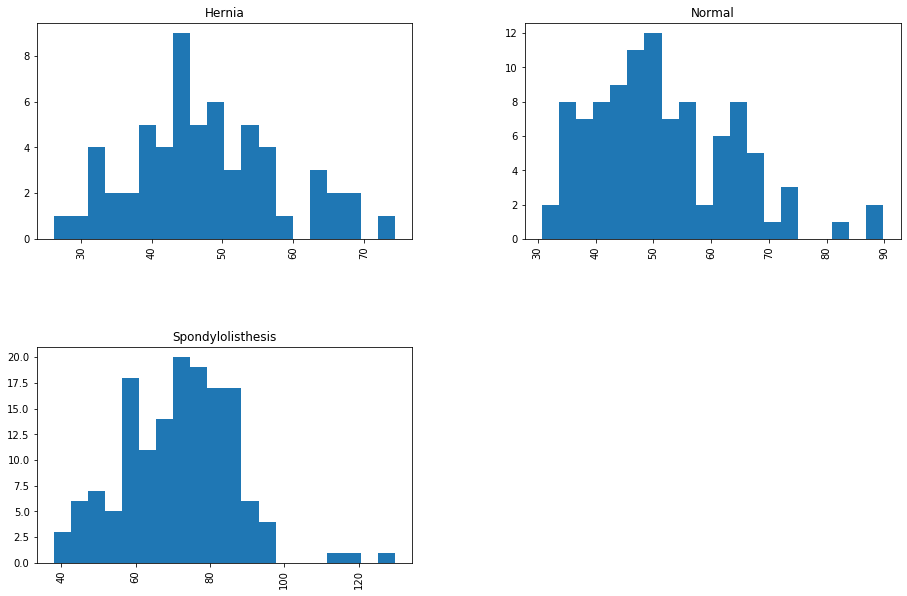

	Distribution of categories Hernia, Normal and Spondylolisthesis in class column against pelvic_tilt


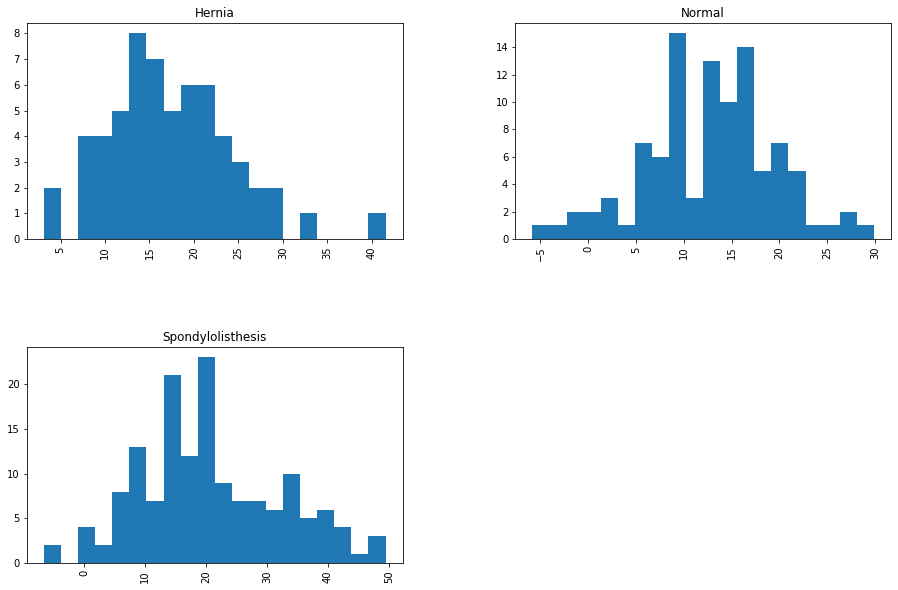

	Distribution of categories Hernia, Normal and Spondylolisthesis in class column against lumbar_lordosis_angle


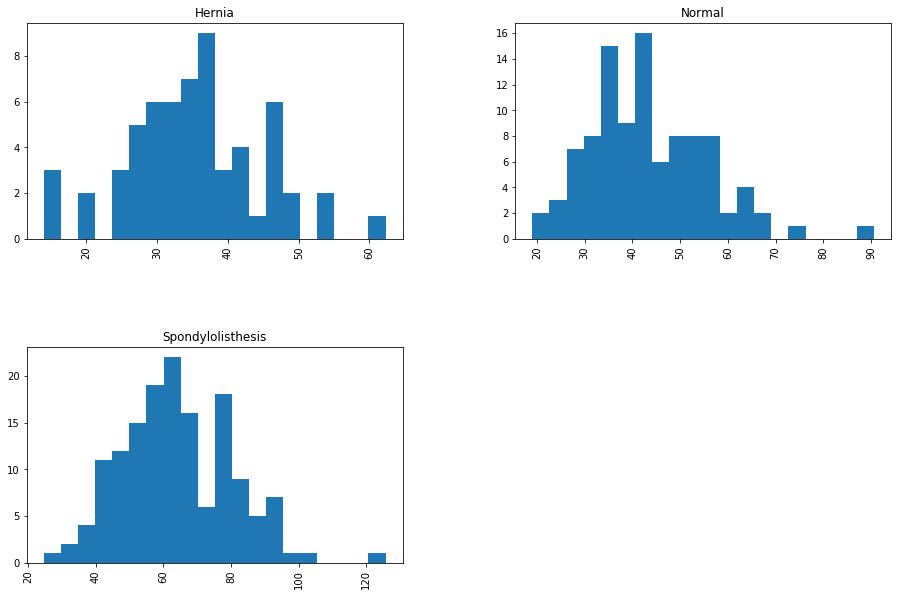

	Distribution of categories Hernia, Normal and Spondylolisthesis in class column against sacral_slope


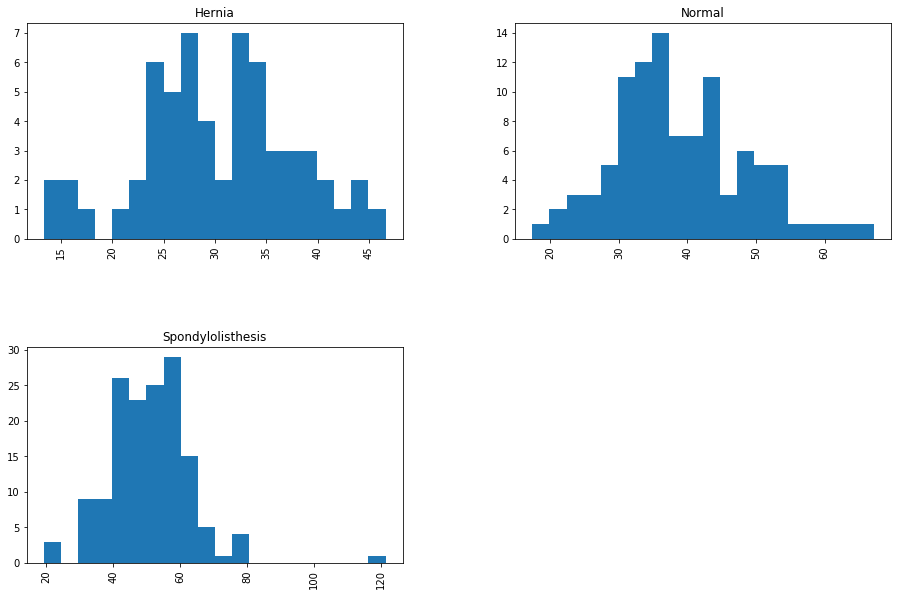

	Distribution of categories Hernia, Normal and Spondylolisthesis in class column against pelvic_radius


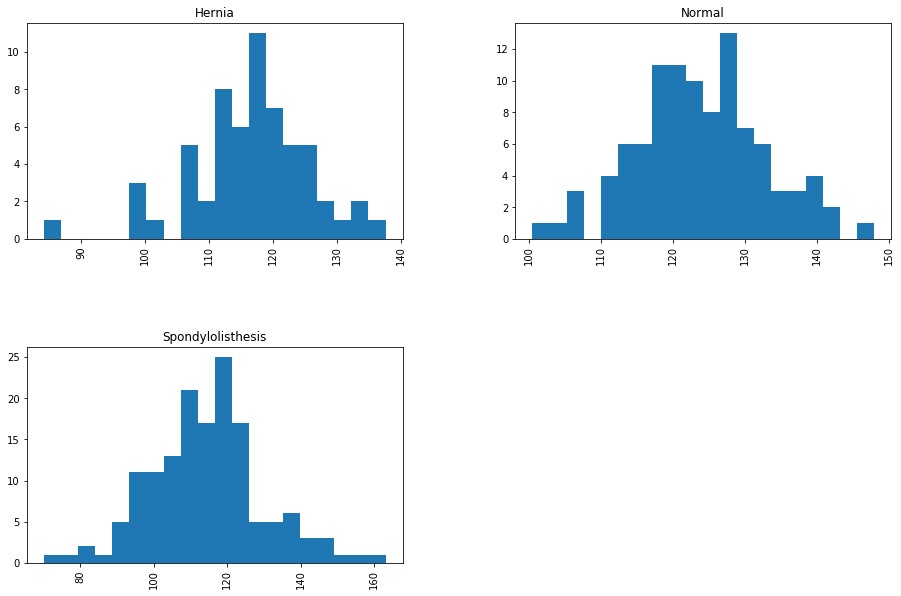

	Distribution of categories Hernia, Normal and Spondylolisthesis in class column against degree_spondylolisthesis


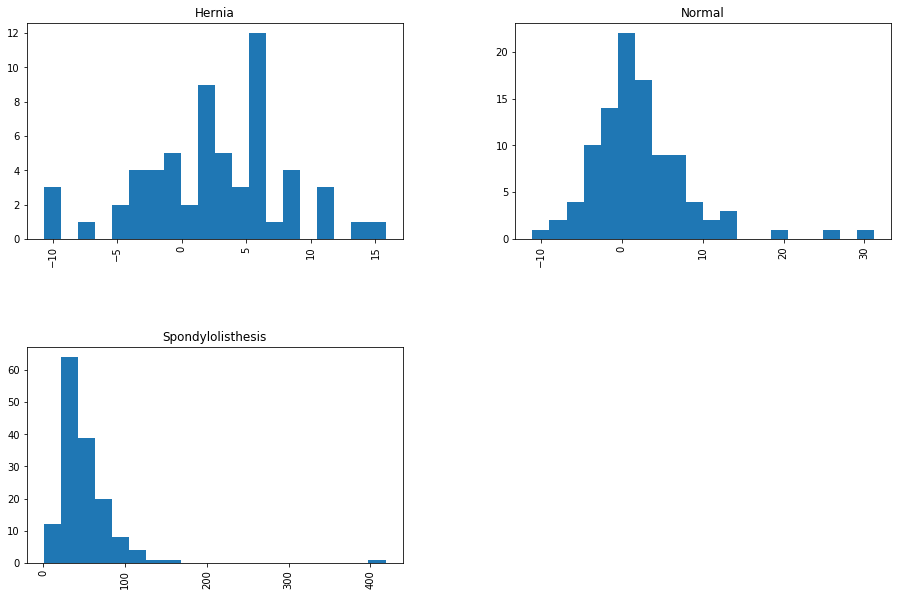

In [79]:
#Distribution of class values
#histogram plots to visualize distribution of categorical class column across the numerical columns.

for col in ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
            'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'] :
    print('\tDistribution of categories Hernia, Normal and Spondylolisthesis in class column against {}'.format(col))
    weka3C_df.hist(by='class', column=col, bins=20, figsize=(15,10))
    plt.show()

In [80]:
print("\nThe distribution of Categorical column 'class' against all other Numerical columns shows-\n")
print('None of the distributions are Normal Distributions')


The distribution of Categorical column 'class' against all other Numerical columns shows-

None of the distributions are Normal Distributions


	Distribution of Numerical column pelvic_incidence


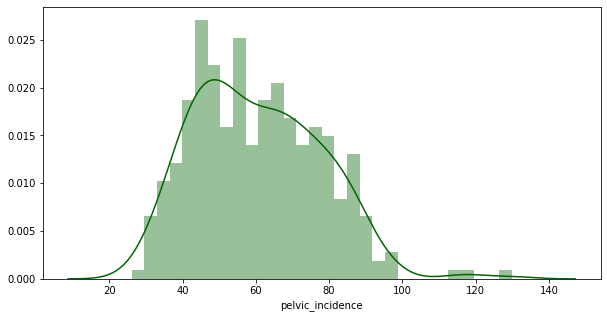

	Distribution of Numerical column pelvic_tilt


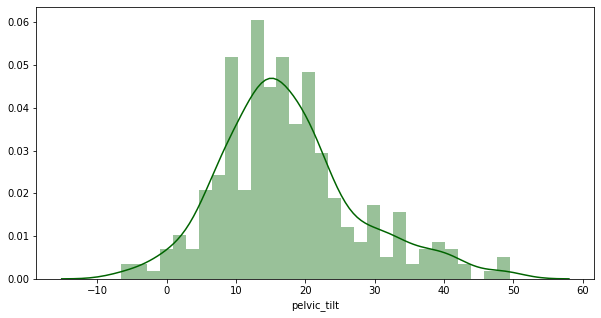

	Distribution of Numerical column lumbar_lordosis_angle


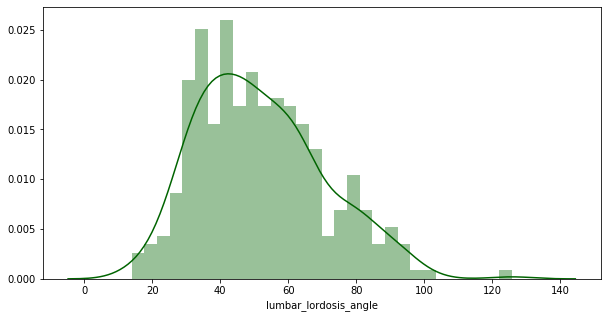

	Distribution of Numerical column sacral_slope


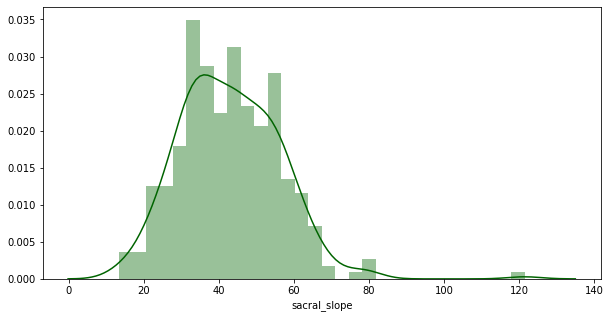

	Distribution of Numerical column pelvic_radius


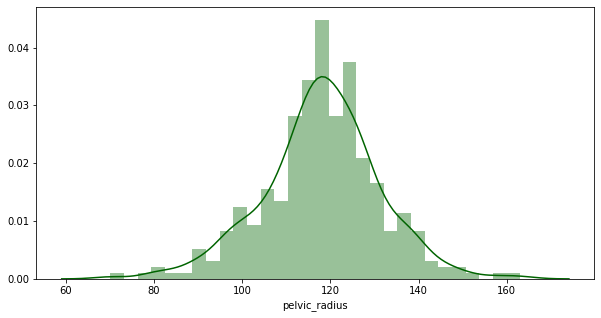

	Distribution of Numerical column degree_spondylolisthesis


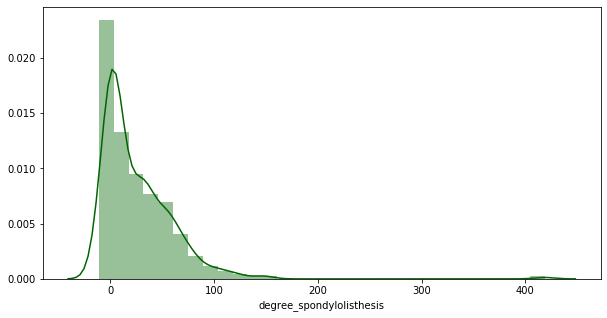

In [81]:
#Distribution of other numerical attributes
#distplots to visualize distribution of numerical columns.

for col in ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
            'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'] :
    print('\tDistribution of Numerical column {}'.format(col))
    plt.figure(figsize=(10,5))
    sns.distplot(weka3C_df[col], bins=30, color='darkgreen')
    plt.show()

In [82]:
print("\nThe distribution of Numerical columns shows-\n")
print("Distributions for 'pelvic_tilt' and 'pelvic_radius'are Slightly Normal Distributions.")
print("Distribution for 'degree_spondylolisthesis' is right skewed.")      
print("Distributions for 'pelvic_incidence','lumbar_lordosis_angle','sacral_slope'are Not Normal Distributions.")      


The distribution of Numerical columns shows-

Distributions for 'pelvic_tilt' and 'pelvic_radius'are Slightly Normal Distributions.
Distribution for 'degree_spondylolisthesis' is right skewed.
Distributions for 'pelvic_incidence','lumbar_lordosis_angle','sacral_slope'are Not Normal Distributions.


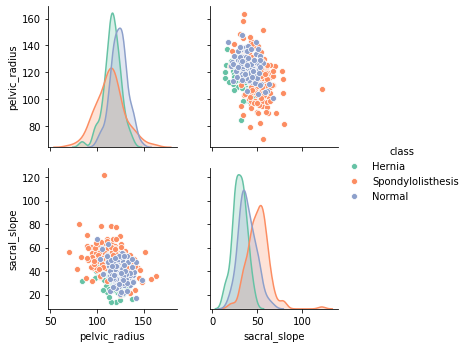

In [83]:
#Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization
#Using seaborn pairplot to plot Numerical and Categorical columns of the DataFrame - 
#Numerical columns : pelvic_radius, sacral_slope.
#Categorical columns : class.

sns.pairplot(vars=['pelvic_radius', 'sacral_slope'], hue='class', data=weka3C_df, palette='Set2')
plt.show()

# Encode the Class variable to integer.

In [84]:
#Using LabelEncoder to change numerical values to categorical values
#Encode labels with value between 0 and n_classes-1 and transform non-numerical labels to numerical labels.

In [85]:
#Create an instance of LabelEncoder() class

le = LabelEncoder()

In [86]:
le

LabelEncoder()

In [87]:
#Fit label encoder and Transform labels to normalized encoding using fit_transform() method
#Change all the categories in 'class' column to numerical values 0,1 and transform them in original dataframe

weka3C_df['class'] =  le.fit_transform(weka3C_df['class'])

In [88]:
#Check the categorical values assigned to 'class' column.
#classes_ attribute holds the label for each category.It gives the array of shape

le.classes_

array(['Hernia', 'Normal', 'Spondylolisthesis'], dtype=object)

In [89]:
#Check Datatypes.class column should be changed to integer type.

weka3C_df.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                         int32
dtype: object

In [90]:
#Check the DataFrame values using head

weka3C_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [91]:
#Check the DataFrame values using tail

weka3C_df.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,1


In [92]:
#Check the DataFrame values using sample()

weka3C_df.sample(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
16,63.834982,20.362507,54.552434,43.472475,112.309492,-0.622527,0
23,45.540790,13.069598,30.298321,32.471192,117.980830,-4.987130,0
44,56.030218,16.297915,62.275275,39.732303,114.023117,-2.325684,0
261,74.976021,14.921705,53.730072,60.054317,105.645400,1.594748,1
56,43.349606,7.467469,28.065483,35.882137,112.776187,5.753277,0


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [93]:
print("Feature columns in the datset:\n{0}\n\nTarget column in the dataset:\n{1}\n"
      .format(list(weka3C_df.columns[:5]), weka3C_df.columns[-1]))

Feature columns in the datset:
['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius']

Target column in the dataset:
class



In [94]:
#Create an np array 'X' with only the feature columns for 'weka_2C' DataFrame.

X = np.array(weka3C_df.drop('class', axis=1))

In [95]:
print('Shape of Feture-set : {0}\nData type of Feature-set : {1}'.format(X.shape, X.dtype))
print('\nChecking data in Feature-set:\n{0}\n\n{1}'.format(X[:3,:], X[-3:]))

Shape of Feture-set : (310, 6)
Data type of Feature-set : float64

Checking data in Feature-set:
[[ 63.0278175   22.55258597  39.60911701  40.47523153  98.67291675
   -0.25439999]
 [ 39.05695098  10.06099147  25.01537822  28.99595951 114.4054254
    4.56425864]
 [ 68.83202098  22.21848205  50.09219357  46.61353893 105.9851355
   -3.53031731]]

[[ 61.44659663  22.6949683   46.17034732  38.75162833 125.6707246
   -2.70787952]
 [ 45.25279209   8.69315736  41.5831264   36.55963472 118.5458418
    0.21475017]
 [ 33.84164075   5.07399141  36.64123294  28.76764934 123.9452436
   -0.19924909]]


In [96]:
#Create an np array 'y' with only the target column for 'weka_2C' DataFrame.

y = np.array(weka3C_df['class'])

In [97]:
print('Shape of Target-set : {0}\nData type of Target-set : {1}'.format(y.shape, y.dtype))
print('\nChecking data in Target-set:\n{0}\n{1}\n{2}'.format(y[:5], y[60:65], y[-5:]))

Shape of Target-set : (310,)
Data type of Target-set : int32

Checking data in Target-set:
[0 0 0 0 0]
[2 2 2 2 2]
[1 1 1 1 1]


# Normalize your Data (X) to get values between 0 to 1.

In [98]:
#zscore() isnused to calculate the z score of each value in the sample.

#MinMaxScaler() is used for scaling features to lie between a given minimum and maximum value.
#Default feature range is between zero and one - [0,1].

In [99]:
#Apply the zscore function from scipy.stats on feature dataset X.
#get the X_zscore dataset containing the zscores of values in all feature columns.
#This step is done to normaliize the distribution of given dataset.

X_zscore = zscore(X)

In [100]:
print('\nChecking the Z-score values in Target-set:\n{0}\n\n{1}'.format(X_zscore[:3,:], X_zscore[-3:,:]))


Checking the Z-score values in Target-set:
[[ 0.14708636  0.50136873 -0.6651769  -0.18495031 -1.4476468  -0.70805942]
 [-1.24586434 -0.74876898 -1.45300075 -1.0415207  -0.26438488 -0.57955637]
 [ 0.4843695   0.46793218 -0.09926175  0.2730833  -0.89768556 -0.79542095]]

[[ 0.05520137  0.51561812 -0.31097748 -0.31356364  0.58289256 -0.77348834]
 [-0.88582307 -0.88565951 -0.55861259 -0.47712775  0.04702109 -0.69554822]
 [-1.54892681 -1.24785954 -0.82539423 -1.05855695  0.45311695 -0.70658867]]


In [101]:
#Use MinMaxScaler class methods on feature dataset X.
#get the X_norm dataset containing values in all feature columns scaled to the [0,1] range.
#This step is done to normaliize the distribution of given dataset.

#create an instance of MinMaxScaler() class

minmax_scaler = MinMaxScaler()

In [102]:
#using fit_transform() method to fit the data points to the range[0,1] and transform them.

X_norm = minmax_scaler.fit_transform(X)

In [103]:
print('Shape of scaled Training-set : {0}\nData type of scaled Training-set : {1}'.format(X_norm.shape, X_norm.dtype))
print('\nChecking data in Training-set scaled to range [0,1]:\n{0}\n\n{1}'.format(X_norm[:3], X_norm[-3:]))

Shape of scaled Training-set : (310, 6)
Data type of scaled Training-set : float64

Checking data in Training-set scaled to range [0,1]:
[[0.35568788 0.51989984 0.22917997 0.2508573  0.30746116 0.02514839]
 [0.12450104 0.2967831  0.09857833 0.14462935 0.47664891 0.03636497]
 [0.41166648 0.51393229 0.32299466 0.30766054 0.38609692 0.0175229 ]]

[[0.34043781 0.52244298 0.28789745 0.23490726 0.59779618 0.01943732]
 [0.18425678 0.27235174 0.24684569 0.21462279 0.52117504 0.02624045]
 [0.07420202 0.20770855 0.20261992 0.14251659 0.57924032 0.02527676]]


# Split the data as train and test with a ratio of 70:30.

In [104]:
#test_train_split function splits the input dataset(np array, DatFrame or lists) into random train and test subsets.

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.30, random_state=1)

In [105]:
print("Training Set Shape:\nFeatures : {0}  Target : {1}\n".format(X_train.shape, y_train.shape))
print("Test Set Shape:\nFeatures : {0}  Target : {1}".format(X_test.shape, y_test.shape))

Training Set Shape:
Features : (217, 6)  Target : (217,)

Test Set Shape:
Features : (93, 6)  Target : (93,)


In [106]:
print("Checking data in X_train:\n{0}\n\n{1}\n".format(X_train[:3,:], X_train[-3:,:]))
print("Checking data in  X_test:\n{0}\n\n{1}\n".format(X_test[:3,:], X_test[-3:,:]))
print("Checking data in  y_train:\n{0}\n\n{1}\n".format(y_train[:5], y_train[-5:]))
print("Checking data in  y_test:\n{0}\n\n{1}\n".format(y_test[:5], y_test[-5:]))

Checking data in X_train:
[[0.47741984 0.46251512 0.44878839 0.39738992 0.27768018 0.18763791]
 [0.22035771 0.35131075 0.33893603 0.2083533  0.60561934 0.026987  ]
 [0.52009848 0.9756669  0.34367835 0.17247823 0.43690728 0.18339214]]

[[0.56734895 0.70688295 0.41935629 0.35707094 0.59767583 0.19876941]
 [0.36438386 0.47379095 0.23426249 0.28308992 0.46224404 0.        ]
 [0.0921583  0.46436296 0.05995934 0.02677405 0.72544522 0.02512723]]

Checking data in  X_test:
[[0.39797628 0.42863211 0.41295557 0.33871847 0.44136006 0.10292294]
 [0.35567325 0.60534235 0.33653315 0.20657584 0.47773703 0.04305865]
 [0.62998616 0.55482934 0.63199181 0.49594972 0.50786215 0.14823333]]

[[0.28639672 0.63233456 0.30150192 0.12612045 0.57242874 0.03228716]
 [0.13696505 0.29917218 0.21449109 0.1553508  0.62295202 0.02680877]
 [0.15309151 0.         0.48235949 0.32582403 0.4463264  0.08937788]]

Checking data in  y_train:
[2 1 2 0 2]

[2 1 2 1 0]

Checking data in  y_test:
[2 1 2 2 2]

[0 1 0 1 2]



# Build the KNN model using Train Dataset and predict the class on test dataset.

In [107]:
#KNeighboursClassifier methods implement the k-nearest neighbors algorithm.
#for n_neighbour value of k=5 create an instance of KNeighboursClassifier class.
#the input params used are k=5 weights used for prediction is distance, p=2 default indicating euclidean distance.
#the algorithm used for prediction is auto (autogenearted based on datasets passsed to fit() method).

k=5
KNN = KNeighborsClassifier(n_neighbors=k, weights='distance')
KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [108]:
#fit method is used to Fit the model using X as feature-set and y as target-set

KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [109]:
#predict method is used to Predict the class labels for the provided test dataset.

yhat = KNN.predict(X_test)

In [110]:
#shape of predicted class labels

yhat.shape

(93,)

In [111]:
#checking data in predicted class labels

print(yhat[:5],'   ',yhat[-5:])

[2 0 2 2 1]     [1 1 0 0 2]


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [112]:
#score method is used to find mean accuracy on the given training data and test data.
#returns the mean accuracy on the given test data and labels.

KNN.score(X_test,y_test)

0.7096774193548387

In [113]:
print('\nThe Perorformance score or mean accuracy of KNN prediction with K value of {0} on test dataset is {1}\n'.format( k, KNN.score(X_test,y_test) ) )


The Perorformance score or mean accuracy of KNN prediction with K value of 5 on test dataset is 0.7096774193548387



# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [114]:
#Using score() method in KNeighborsClassifier class to find the best K value.
#The score() method takes the passed matrix X_test,calls predict and calls accuracy_score.
#We need not explicitly call the predict() method to predict the labels.
#Finding the mean accuracy for K values in range from 1 to 100 to find best K value.

k_range = 100
mean_test_acc = np.zeros(k_range)

for n in range(1,k_range+1) :
    KNN = KNeighborsClassifier(n_neighbors=n, weights='distance')
    KNN.fit(X_train, y_train)
    mean_test_acc[n-1] = KNN.score(X_test, y_test)  

In [115]:
#the array of mean accuracy scores using score() method for different K values in the range taken.

mean_test_acc

array([0.68817204, 0.68817204, 0.69892473, 0.70967742, 0.70967742,
       0.68817204, 0.70967742, 0.72043011, 0.70967742, 0.72043011,
       0.7311828 , 0.75268817, 0.76344086, 0.75268817, 0.7311828 ,
       0.7311828 , 0.7311828 , 0.74193548, 0.7311828 , 0.74193548,
       0.74193548, 0.74193548, 0.74193548, 0.7311828 , 0.75268817,
       0.75268817, 0.76344086, 0.76344086, 0.75268817, 0.76344086,
       0.7311828 , 0.74193548, 0.76344086, 0.74193548, 0.75268817,
       0.7311828 , 0.7311828 , 0.72043011, 0.7311828 , 0.74193548,
       0.74193548, 0.74193548, 0.75268817, 0.74193548, 0.75268817,
       0.74193548, 0.74193548, 0.7311828 , 0.7311828 , 0.72043011,
       0.7311828 , 0.7311828 , 0.72043011, 0.70967742, 0.72043011,
       0.72043011, 0.72043011, 0.7311828 , 0.7311828 , 0.72043011,
       0.74193548, 0.7311828 , 0.72043011, 0.72043011, 0.72043011,
       0.7311828 , 0.72043011, 0.74193548, 0.74193548, 0.7311828 ,
       0.72043011, 0.70967742, 0.69892473, 0.69892473, 0.68817

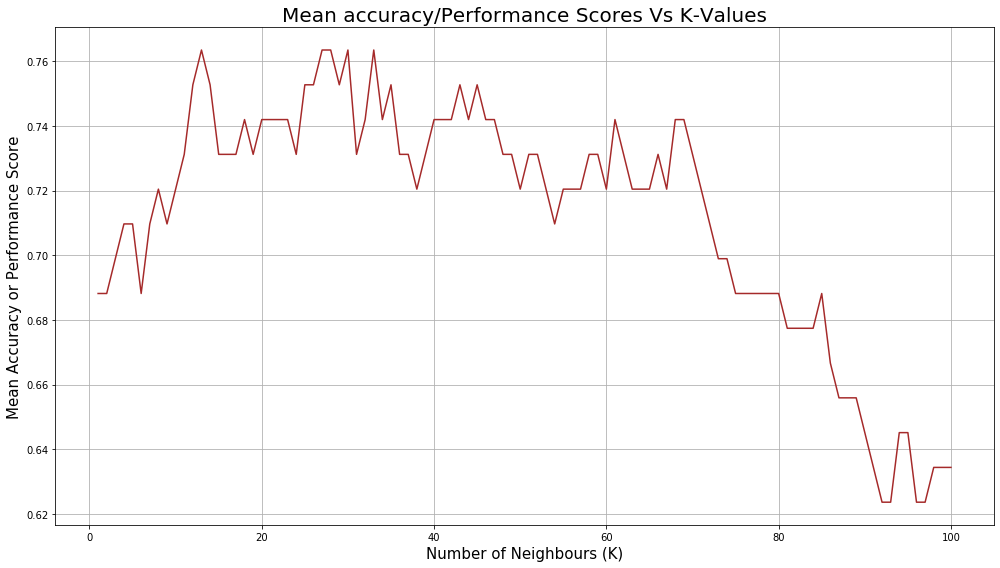

In [116]:
#Plot the Mean accuracy scores from score() method against the K values using matplotlib.pyplot.plot()

plt.figure(figsize=(14,8))
plt.plot(range(1,k_range+1), mean_test_acc, 'brown')
plt.grid()
plt.title('Mean accuracy/Performance Scores Vs K-Values', fontsize=20)
plt.xlabel('Number of Neighbours (K)', fontsize=15)
plt.ylabel('Mean Accuracy or Performance Score', fontsize=15)
plt.tight_layout()
plt.show()

In [117]:
print('\nBest accuracy is {0} for a K value of {1}'.format(mean_test_acc.max(), mean_test_acc.argmax()+1))
print('\nThe Best K-value for the classification is K = {}\n'.format(mean_test_acc.argmax()+1))


Best accuracy is 0.7634408602150538 for a K value of 13

The Best K-value for the classification is K = 13



In [118]:
#The sklearn.metrics module includes score functions, performance metrics, pairwise metrics and distance computations.
#accuracy_score() gives Accuracy classification score.calculates accuracy of set of labels predicted for a sample.

In [119]:
#Using accuracy_score() method from sklearn.metrics to find the best K value.
#We need to call the predict() method to predict the labels before using accuracy_score() method.
#Misclassification error (MSE) = 1 - Test accuracy score.
#Finding the accuracy score for K values in range from 1 to 100 to find best K value.

k_range = 100
acc_score = np.zeros(k_range)
misclass_err = np.zeros(k_range)

for n in range(1,k_range+1) :
    KNN = KNeighborsClassifier(n_neighbors=n, weights='distance')
    KNN.fit(X_train, y_train)
    yhat = KNN.predict(X_test)
    acc_score[n-1] = accuracy_score(y_test, yhat)
    misclass_err[n-1] = 1 - accuracy_score(y_test, yhat)

In [120]:
#the array of accuracy scores using accuracy_score() method for different K values in the range taken.

acc_score

array([0.68817204, 0.68817204, 0.69892473, 0.70967742, 0.70967742,
       0.68817204, 0.70967742, 0.72043011, 0.70967742, 0.72043011,
       0.7311828 , 0.75268817, 0.76344086, 0.75268817, 0.7311828 ,
       0.7311828 , 0.7311828 , 0.74193548, 0.7311828 , 0.74193548,
       0.74193548, 0.74193548, 0.74193548, 0.7311828 , 0.75268817,
       0.75268817, 0.76344086, 0.76344086, 0.75268817, 0.76344086,
       0.7311828 , 0.74193548, 0.76344086, 0.74193548, 0.75268817,
       0.7311828 , 0.7311828 , 0.72043011, 0.7311828 , 0.74193548,
       0.74193548, 0.74193548, 0.75268817, 0.74193548, 0.75268817,
       0.74193548, 0.74193548, 0.7311828 , 0.7311828 , 0.72043011,
       0.7311828 , 0.7311828 , 0.72043011, 0.70967742, 0.72043011,
       0.72043011, 0.72043011, 0.7311828 , 0.7311828 , 0.72043011,
       0.74193548, 0.7311828 , 0.72043011, 0.72043011, 0.72043011,
       0.7311828 , 0.72043011, 0.74193548, 0.74193548, 0.7311828 ,
       0.72043011, 0.70967742, 0.69892473, 0.69892473, 0.68817

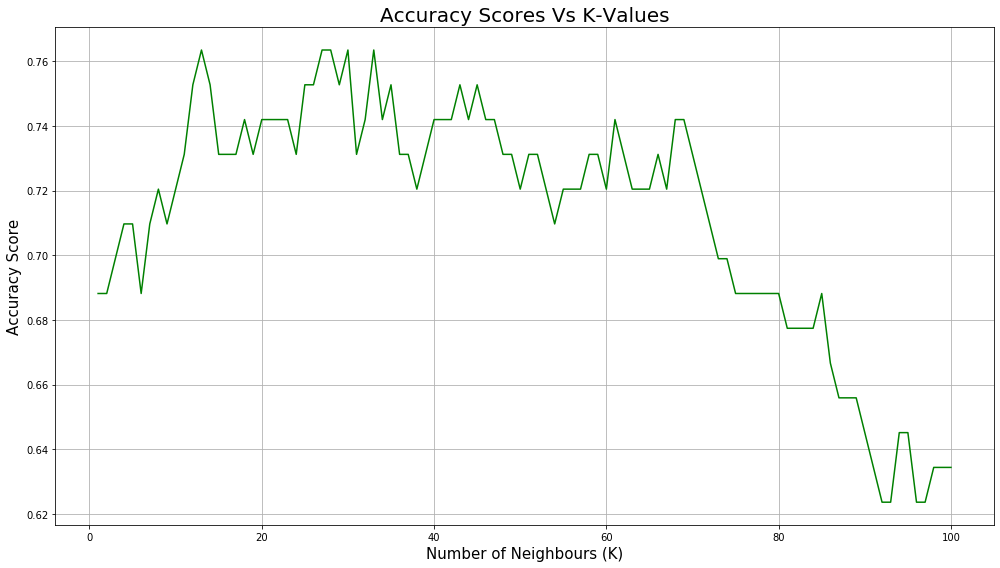

In [121]:
#Plot the accuracy scores from accuracy_score() function against the K values using matplotlib.pyplot.plot()

plt.figure(figsize=(14,8))
plt.plot(range(1,k_range+1), acc_score, 'g')
plt.grid()
plt.title('Accuracy Scores Vs K-Values', fontsize=20)
plt.xlabel('Number of Neighbours (K)', fontsize=15)
plt.ylabel('Accuracy Score', fontsize=15)
plt.tight_layout()
plt.show()

In [122]:
print('\nBest accuracy is {0} for a K value of {1}'.format(acc_score.max(), acc_score.argmax()+1))
print('\nThe Best K-value for the classification is K = {}\n'.format(acc_score.argmax()+1))


Best accuracy is 0.7634408602150538 for a K value of 13

The Best K-value for the classification is K = 13



In [123]:
#the array of Misclassification error (MSE) scores for different K values in the range taken.
#Misclassification error (MSE) is given by 1-accuracy_score()

misclass_err

array([0.31182796, 0.31182796, 0.30107527, 0.29032258, 0.29032258,
       0.31182796, 0.29032258, 0.27956989, 0.29032258, 0.27956989,
       0.2688172 , 0.24731183, 0.23655914, 0.24731183, 0.2688172 ,
       0.2688172 , 0.2688172 , 0.25806452, 0.2688172 , 0.25806452,
       0.25806452, 0.25806452, 0.25806452, 0.2688172 , 0.24731183,
       0.24731183, 0.23655914, 0.23655914, 0.24731183, 0.23655914,
       0.2688172 , 0.25806452, 0.23655914, 0.25806452, 0.24731183,
       0.2688172 , 0.2688172 , 0.27956989, 0.2688172 , 0.25806452,
       0.25806452, 0.25806452, 0.24731183, 0.25806452, 0.24731183,
       0.25806452, 0.25806452, 0.2688172 , 0.2688172 , 0.27956989,
       0.2688172 , 0.2688172 , 0.27956989, 0.29032258, 0.27956989,
       0.27956989, 0.27956989, 0.2688172 , 0.2688172 , 0.27956989,
       0.25806452, 0.2688172 , 0.27956989, 0.27956989, 0.27956989,
       0.2688172 , 0.27956989, 0.25806452, 0.25806452, 0.2688172 ,
       0.27956989, 0.29032258, 0.30107527, 0.30107527, 0.31182

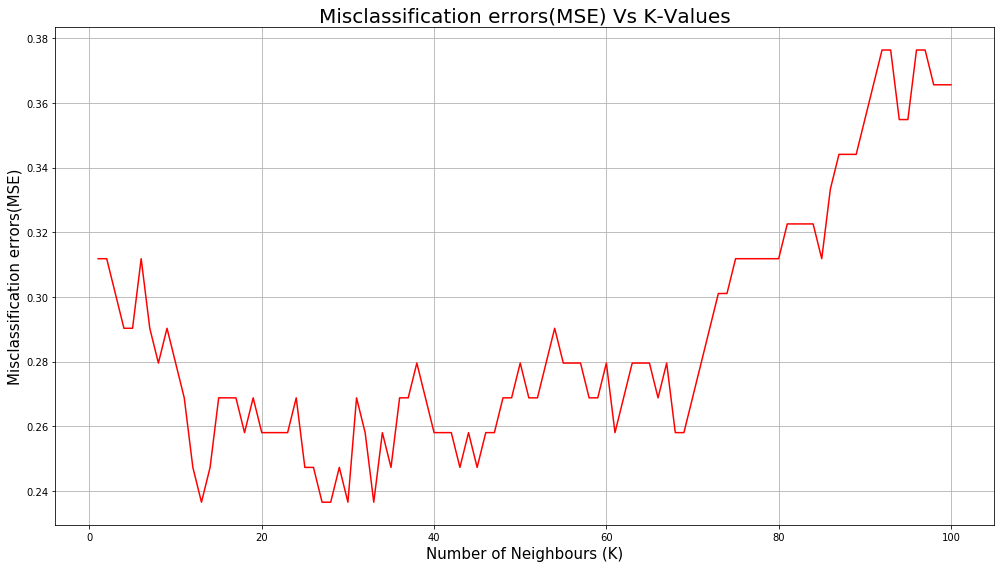

In [124]:
#Plot the Misclassification errors (MSE) against the K values using matplotlib.pyplot.plot()

plt.figure(figsize=(14,8))
plt.plot(range(1,k_range+1), misclass_err, 'r')
plt.grid()
plt.title('Misclassification errors(MSE) Vs K-Values', fontsize=20)
plt.xlabel('Number of Neighbours (K)', fontsize=15)
plt.ylabel('Misclassification errors(MSE)', fontsize=15)
plt.tight_layout()
plt.show()

In [125]:
print('\nMaximum number of Misclassification errors are seen for a score of {0} for a K value of {1}\n'.format(misclass_err.max(), misclass_err.argmax()+1))


Maximum number of Misclassification errors are seen for a score of 0.3763440860215054 for a K value of 92

